In [1]:
#--------------LOAD DIABETS DATASET--------
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

# Load the diabetes dataset
from sklearn import datasets
#from sklearn.datasets import load_boston
X, y = datasets.load_diabetes(return_X_y=True)
#X, y = datasets.load_boston(return_X_y=True)
#from sklearn.datasets import load_boston
#from sklearn.metrics import mean_squared_error, r2_score


#---- Split to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=  train_test_split(X, y, train_size=0.8, random_state=2021, shuffle=True)

#---- Normalization
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)



 ====Linear Regression====
R2 train score = 0.5072310411992973
R2 test score = 0.5235981657836772
b: 16.38863512300688, 
w= [  0.18633189 -22.08455995 142.24552893  56.60438201 -99.36465563
  57.01153398 -19.28735808  39.43142534 148.80781716  24.76191428]


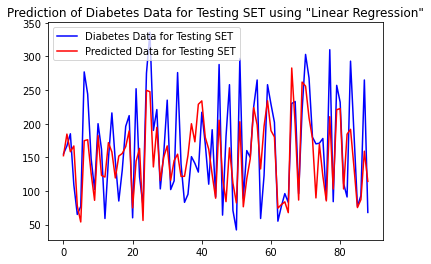

In [4]:

#---- Linear Regression
from sklearn.linear_model import LinearRegression
#lin_reg=LinearRegression(normalize=False,)
lin_reg=LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
#lin_reg.fit(X_train,y_train)
regressor = lin_reg
print ('\n ====Linear Regression====')
print ('R2 train score =', regressor.score(X_train_scaled, y_train))
print ('R2 test score =', regressor.score(X_test_scaled, y_test))
#print ('R2 train score =', regressor.score(X_train, y_train))
#print ('R2 test score =', regressor.score(X_test, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

plt.figure()
y_line= lin_reg.predict(X_test_scaled)
#plt.plot((y_test-y_line), label='Absolute Differences in Predictions of Diabetes Data for Testing SET', color= 'b')
plt.plot(y_test, label='Diabetes Data for Testing SET', color= 'b')
plt.plot(y_line, label='Predicted Data for Testing SET', color= 'r')
plt.title('Prediction of Diabetes Data for Testing SET using "Linear Regression"')
plt.legend() 
plt.show() 


 ====Ridge====
R2 train score = 0.5054487668247637
R2 test score = 0.507746329173383
b: 43.3858847991834, 
w= [  1.72984753 -21.63707057 132.81179783  56.77575246 -15.41162361
 -17.59047398 -54.36038187  34.87176768 109.0427753   27.4038469 ]


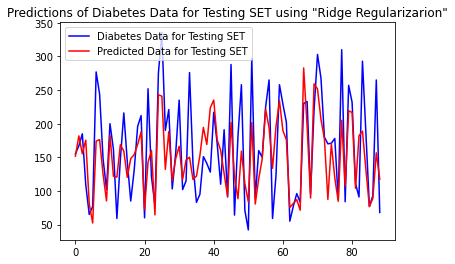

In [6]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(X_train_scaled,y_train)
regressor = ridge_reg
print ('\n ====Ridge====')
print ('R2 train score =', regressor.score(X_train_scaled, y_train))
print ('R2 test score =', regressor.score(X_test_scaled, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

plt.figure()
y_line= ridge_reg.predict(X_test_scaled)
#plt.plot((y_test-y_line), label='Absolute Differences in Predictions of Diabetes Data for Testing SET', color= 'b')
plt.plot(y_test, label='Diabetes Data for Testing SET', color= 'b')
plt.plot(y_line, label='Predicted Data for Testing SET', color= 'r')
plt.title('Predictions of Diabetes Data for Testing SET using "Ridge Regularizarion"')
plt.legend() 
plt.show() 


 ====Lasso====
R2 train score = 0.488580748677269
R2 test score = 0.47582582404473206
b: 46.8825221091369, 
w= [  0.          -9.4740844  135.0779088   40.62513031  -0.
  -0.         -41.76775684   0.         115.21015045   3.13565119]


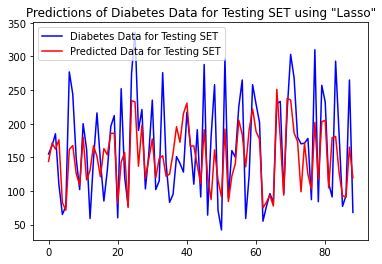

In [7]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso()
lasso_reg.fit(X_train_scaled,y_train)
regressor = lasso_reg
print ('\n ====Lasso====')
print ('R2 train score =', regressor.score(X_train_scaled, y_train))
print ('R2 test score =', regressor.score(X_test_scaled, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

plt.figure()
y_line= lasso_reg.predict(X_test_scaled)
#plt.plot((y_test-y_line), label='Absolute Differences in Predictions of Diabetes Data for Testing SET', color= 'b')
plt.plot(y_test, label='Diabetes Data for Testing SET', color= 'b')
plt.plot(y_line, label='Predicted Data for Testing SET', color= 'r')
plt.title('Predictions of Diabetes Data for Testing SET using "Lasso"')
plt.legend() 
plt.show()


 ====Polynomial + Linear Regression with Normalization (Degree 2)==== 
X_train.shape=  (353, 10)
X_train_poly.shape=  (353, 65)
R2 train score = 0.5422915286997163
R2 test score = 0.19567842420215398
b: -1255.1494862703744, 
w= [ 2.74927372e+01  5.14666208e+15  7.06320552e+01  1.21748723e+02
 -3.97468176e+03  4.11130478e+03  1.51885268e+03  1.44312709e+02
  1.38938845e+03  1.26250000e+01  3.45000000e+01  4.07500000e+01
  6.28125000e+01  7.87500000e+00  2.78750000e+02 -3.84187500e+02
 -5.88750000e+01  4.78750000e+01 -6.38750000e+01 -1.72500000e+01
 -5.14666208e+15  6.30625000e+01 -1.56250000e+00 -1.06812500e+02
  1.21375000e+02  4.33281250e+01 -1.41531250e+02  7.40625000e+01
  3.47500000e+01  3.68125000e+01  6.56250000e-01  4.36250000e+01
 -3.85000000e+01  5.52343750e+01 -1.02500000e+01  4.33125000e+01
  3.27500000e+01 -3.11640625e+01  3.94687500e+02 -3.08937500e+02
 -1.97234375e+02  4.93750000e+00 -1.38281250e+02  6.40625000e+00
  1.44943750e+03 -2.46268750e+03 -1.32195312e+03 -1.2591

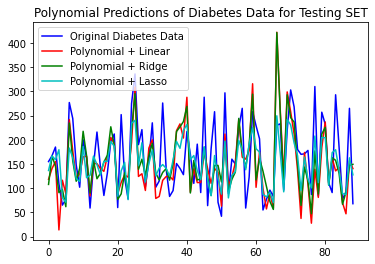

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2,include_bias=False) # default is True means to return the first feature of all 1 as for degree 0 
X_train_poly= poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print ('\n ====Polynomial + Linear Regression with Normalization (Degree 2)==== ')
print ('X_train.shape= ',X_train.shape)
print ('X_train_poly.shape= ',X_train_poly.shape)
# # X_train_poly[:5]

#---- Normalization
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled= scaler.transform(X_test_poly)

poly_lin_reg = LinearRegression().fit (X_train_poly_scaled,y_train)
regressor = poly_lin_reg
#print ('\n ====Polynomial + Linear Regression with Normalization (Degree 2)==== ')
print ('R2 train score =', regressor.score(X_train_poly_scaled, y_train))
print ('R2 test score =', regressor.score(X_test_poly_scaled, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

print ('\n ====Polynomial + Ridge with Normalization (Degree 2, alpha=0.001)==== ')
print ('X_train.shape= ',X_train_scaled.shape)
print ('X_train_poly.shape= ',X_train_poly_scaled.shape)
poly_ridge = Ridge(alpha=0.001, max_iter=1e5).fit (X_train_poly_scaled,y_train) # Increased max-iter and alpha
regressor = poly_ridge
print ('R2 train score =', regressor.score(X_train_poly_scaled, y_train))
print ('R2 test score =', regressor.score(X_test_poly_scaled, y_test))
w= regressor.coef_
print ('b: {}, \nw= {}'.format(regressor.intercept_, w)) 


print ('\n ====Polynomial + Lasso with Normalization (Degree 2)==== ')
print ('X_train.shape= ',X_train.shape)
print ('X_train_poly.shape= ',X_train_poly.shape)
poly_lasso = Lasso(max_iter=100000).fit (X_train_poly_scaled,y_train)
regressor = poly_lasso
print ('Polynomial + Lasso')
print ('R2 train score =', regressor.score(X_train_poly_scaled, y_train))
print ('R2 test score =', regressor.score(X_test_poly_scaled, y_test))

plt.figure()
plt.title('Polynomial Predictions of Diabetes Data for Testing SET')
plt.plot(y_test, label='Original Diabetes Data', color= 'b')
y_line= poly_lin_reg.predict(X_test_poly_scaled)
plt.plot(y_line, label='Polynomial + Linear', color= 'r')
y_line= poly_ridge.predict(X_test_poly_scaled)
plt.plot(y_line, label='Polynomial + Ridge', color= 'g')
y_line= poly_lasso.predict(X_test_poly_scaled)
plt.plot(y_line, label='Polynomial + Lasso', color= 'c')
plt.legend() 
plt.show()